<a href="https://colab.research.google.com/github/angel-lar/Metodos-numericos/blob/main/LAGRANGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{Polinomio de interpolación de Lagrange}$

$\text{para encontrar el polinamio de grado }n-1\text{ que pasa por }n\text{ puntos, usamos la formula: }$

$P(x) = \sum_{i=0}^{n-1} y_i \cdot \prod_{\substack{0 \leq j \leq n-1 \\ j \neq i}} \frac{x - x_j}{x_i - x_j} $

$\text{la cual programaremos a continuación: }\\
\text{Importamos la libreria }sympy$

In [32]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

$\text{definamos la funcion: }$

In [25]:
def lagrange(points):#el parametro será la lista de puntos
    x = sp.Symbol('x')
    n = len(points) #n es el numero de puntos
    polinomio = 0 #lo inicializamos en cero

    for i in range(n):
        xi, yi = puntos[i] #vamos a pedirle los n puntos y los guardamos en el array
        termino = yi #esta será la variable para ir metiendo cada termino
        for j in range(n):
            if i != j:
                xj, _ = puntos[j]
                termino *= (x - xj) / (xi - xj)#calculamos cada termino y se lo concatenamos al polinomio
        polinomio += termino

    return sp.expand(polinomio)

$\text{solicitamos el numero de puntos y creamos el arreglo}$

In [34]:
x = sp.Symbol('x')
n = int(input("¿Cuántos puntos vas a ingresar? "))
puntos = []

¿Cuántos puntos vas a ingresar? 4


$\text{vamos a pedirle el (x,y) n veces y los agregamos al array}$

In [35]:
for i in range(n):
  xi = float(input(f"Ingrese x_{i}: "))
  yi = float(input(f"Ingrese y_{i}: "))
  puntos.append((xi, yi))

Ingrese x_0: 1
Ingrese y_0: 1
Ingrese x_1: 2
Ingrese y_1: 2
Ingrese x_2: 3
Ingrese y_2: 3
Ingrese x_3: 4
Ingrese y_3: 4


$\text{guardamos el polinomio en poli}$

In [36]:
poli = lagrange(puntos)

$\text{imprimimos el resultado}$

In [37]:
print("\nEl polinomio de Lagrange es:")
sp.pprint(poli, use_unicode=True)


El polinomio de Lagrange es:
1.0⋅x


$\text{evaluamos el polinomio en el punto deseado e imprimimos el resultado}$

In [38]:
valor = float(input("\nIngresa un valor de x para evaluar el polinomio: "))
resultado = poli.subs(x, valor).evalf()#subs remplaza en este caso "x" por (valor) y evalf lo evalua en decimales
print(f"\nP({valor}) = {resultado}")


Ingresa un valor de x para evaluar el polinomio: 2.5

P(2.5) = 2.50000000000000


$\text{para graficar hay que cpnvertir el polinomio a una funcion numerica}$

In [42]:
funcion = sp.lambdify(x, poli, 'numpy')#lambdify convierte una expresion simbolica en una funcion numerica

$\text{Creamos una particion para el dominio y los Y's serán los valores de la funcion}$

In [45]:
X = np.linspace(min([xi for xi, yi in puntos]) - 1, max([xi for xi, yi in puntos]) + 1, 400)
Y = funcion(x_vals)

$\text{el resto del codigo lo unificaré para que salga todo en una misma grafica}$

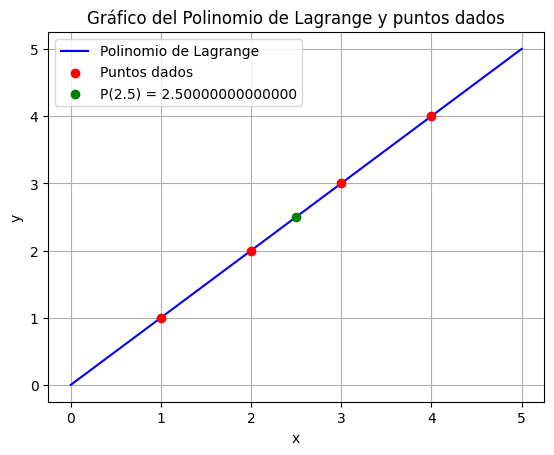

In [47]:
#con ese "dominio" y los valores que toma creamos la grafica
plt.plot(X, Y, label='Polinomio de Lagrange', color='blue')

#tomamos la primera entrada de las tuplas que estan en puntos, es decir las x's y las guardamos. de la misma forma lo hacermos con Y
puntos_x = [xi for xi, yi in puntos]
puntos_y = [yi for xi, yi in puntos]
plt.scatter(puntos_x, puntos_y, color='red', zorder=5, label='Puntos dados')#scatter hace la grafica discreta de esos puntos

# de la misma forma graficamos el punto en el que evaluamos el polinomio al final
plt.scatter([valor], [resultado], color='green', zorder=5, label=f'P({valor}) = {resultado}')

# Etiquetas y título
plt.title('Gráfico del Polinomio de Lagrange y puntos dados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()